<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/The_law_of_large_numbers%2C_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#

# The Law of Large Numbers

Let's explore this concept, LLN, which is important in statistics and machine learning.

Let's do also some sampling, and Monte Carlo sampling.

LLN as the number of experiment repetitions increases, the average of the sample means better approximates the population mean.

Example: in a population of millions of people, we can sample with one hundred people, that will represent these numbers. These one hundred samples approximates the population mean better than if we used fifty samples.

## Creating a population of numbers

In [3]:
import matplotlib.pyplot as plt
import numpy as np

population_size = 2.3e5 # what this notation means: 2.3 * 10^5
print(population_size)
print(2.3 * pow(10, 5))

230000.0
229999.99999999997


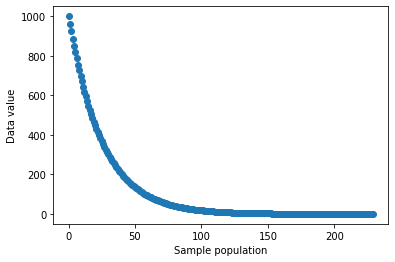

In [4]:
# generating the populatio of numbers
skip = int(1e3) # 1 * 10^3
population = 1 / np.logspace(np.log10(.001), np.log10(10), int(population_size))

plt.plot(population[::skip], 'o')
plt.xlabel('Sample population')
plt.ylabel('Data value')
plt.show()

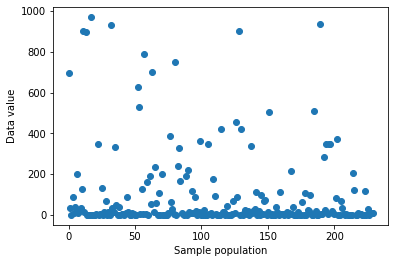

In [5]:
# let's shuffle the data
np.random.shuffle(population) # variable is going to change in the method

plt.plot(population[::skip], 'o')
plt.xlabel('Sample population')
plt.ylabel('Data value')
plt.show()

# Monte Carlo sampling

Means randomly sampling from a population. In our population of size 23000, we want to:
- randomly select only fifty of those, and then compute the average of them.
- and then again, select fifty more, compute average...
- repeat it 500 times. In the final, we have 500 samples and its means.

In [8]:
len(population)

230000

In [33]:
sample_size = 50
number_of_samples = 500

average_list = []

for i in range(number_of_samples): # randomly selecting fifty samples, 500 times and getting its means
  sample = np.random.choice(population, size = sample_size)
  mean = np.mean(sample)
  average_list.append(mean)

In [35]:
real_average = np.mean(population)
real_average

108.56446524669427

In [34]:
len(average_list)

500

In [37]:
average_list[0:4]

[122.55649399936335, 128.4440728467471, 119.38532148327614, 106.4400271752502]

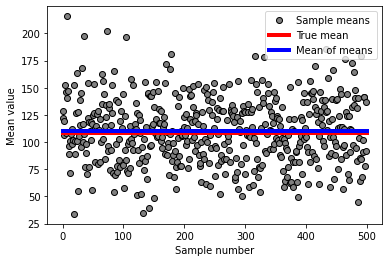

In [47]:
plt.plot(average_list, 'ko', markerfacecolor='grey', label='Sample means')
plt.plot([0, number_of_samples], [real_average, real_average], 'r', linewidth=4, label='True mean')
plt.plot([0, number_of_samples], [np.mean(average_list), np.mean(average_list)], 'b', linewidth=4, label='Mean of means')
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.show()

Wow! The mean of all randomly choosen samples approximatelly so much of the real population mean.

# Cumulative averaging

The more the number of randomly choosen samples increases, more the mean approximates of the real population mean. (Sometimes is going to diverge, but at some point, it gets stabilized. Let's generate a graph to show this).



In [51]:
means_through_iterations = []
for i in range(len(average_list)):
  mean_in_iteration = np.mean(average_list[0:i])
  means_through_iterations.append(mean_in_iteration)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
means_through_iterations[0:5]

[nan,
 122.55649399936335,
 125.50028342305524,
 123.4619627764622,
 119.2064788761592]

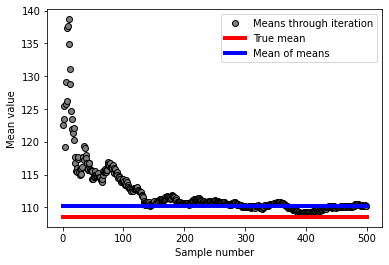

In [54]:
plt.plot(means_through_iterations, 'ko', markerfacecolor='grey', label='Means through iteration')
plt.plot([0, number_of_samples], [real_average, real_average], 'r', linewidth=4, label='True mean')
plt.plot([0, number_of_samples], [np.mean(average_list), np.mean(average_list)], 'b', linewidth=4, label='Mean of means')
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Mean value')
plt.show()

# Central Limit Theorem

The law of large numbers (LLM) is closely related to another theorem in statistics, the Central Limit Theorem, who tells us that the distribution of sample means is going to be roughly Gaussian distributed, that is, shape of normal distribution, or bell/sine curve.

How to plot to view this distribution? Using the histogram in the list of sample means. It will agroup in bins (rectangles) by its values. The most common values of means are going to have more quantity in the distribution of different values.

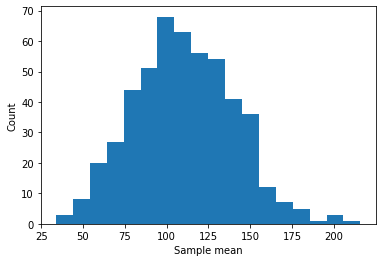

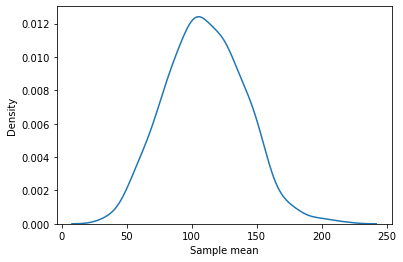

In [63]:
import seaborn as sns

plt.hist(average_list, bins='fd') # fd -> freedman-diaconis, algorithm takes account number of data points and the variability of these data points
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.show()

sns.kdeplot(average_list)
plt.xlabel('Sample mean')
plt.show()

Did you see? If we plot an estimate curve line, its going to aproximate of a normal distribution curve!